<a href="https://colab.research.google.com/github/victorviro/Time-series-classification-task/blob/master/Copia_github_de_time_series_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series introduction


A time series is a series of data points ordered in time. There is explicit order dependence between observations. In a normal machine learning dataset, the dataset is a collection of observations that are treated equally and it does not consider an order with each other. In time series the order of observations provides a source of additional information that should be analyzed and used in the prediction process.

Time series are typically assumed to be generated at regular intervals of time (e.g. daily temperature), and so are called regular time series. But the data in a time series doesn’t have to come in regular time intervals. In that case, it is called an irregular time series. In irregular time series, the data follows a temporal sequence, but the measurements might not occur at regular time intervals. For example, the data might be generated as a burst or with varying time intervals. Account deposits or withdrawals from an ATM are examples of an irregular time series.

Time series can have one or more variables that change over time.
If there is only one variable varying over time, we call it Univariate time series. If there is more than one variable it is called Multivariate time series.




# Problem

A lot of financial companies develop quantitative algorithms. To design more robust algorithms they want to know if some investment time series are real or have been generated.

We provide a dataset with 10k of financial series. In this dataset each row represents a financial series and columns depict regular intervals of time. There is an extra column, the target variable. The variable's value is 1 when the series is real and 0 when the series is synthetic. So we treat with a binary classification task.

## Load data

In [25]:
from pandas import read_csv, DataFrame

# Load the training set      
training_set = read_csv("train1.csv")
print(training_set.shape)

# Get the target variable. 
# It's binary variable
Y = training_set['class'][0:10000]

# Get the series removing target variable of training set
X = training_set.drop('class', axis=1)
X.head()


(10000, 261)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259
0,-1.104630e-03,-0.008847,-0.007810,-1.783134e-02,-1.030422e-02,-0.006115,-0.016794,0.000338,0.002705,-0.000843,-0.004387,-0.006102,0.012278,0.002358,-1.042018e-02,0.008662,-4.546215e-03,-0.014716,-0.008642,-6.450496e-03,-0.010353,-0.003014,-0.010493,-0.009885,5.808698e-03,0.008843,0.050805,-0.008172,-0.021627,-0.001053,0.011240,-0.004689,-0.001745,0.015906,-0.011012,-0.007307,0.023484,-0.005822,0.004134,-0.017496,...,-0.003462,-0.009517,-0.010066,-0.007395,-2.638517e-03,0.001401,-0.004351,0.002029,-0.000467,0.001558,-0.003112,-9.989064e-03,0.006937,0.001253,0.001564,-0.000312,0.002655,0.003583,0.004191,-0.001391,-0.002786,-6.673916e-03,-0.008906,0.000158,-0.019546,0.001286,0.002890,0.007685,-0.001112,3.658329e-03,-8.399353e-03,0.021736,0.001095,0.006094,0.001708,-0.000775,0.003724,-0.010666,0.000781,-0.004840
1,-6.974439e-14,-0.021210,-0.029318,-3.545635e-02,2.791017e-02,0.005298,-0.017787,-0.014085,0.004082,0.023713,-0.009927,-0.034759,0.018006,0.019728,-6.671097e-03,0.019476,1.712780e-02,0.007772,-0.007069,3.236252e-03,-0.001935,-0.019392,0.027686,0.004490,-6.385680e-03,-0.011568,0.018205,-0.008940,-0.002508,0.005833,0.007732,-0.008312,-0.007092,-0.008442,-0.007204,-0.018470,-0.005376,-0.006081,0.007478,0.006748,...,-0.002865,-0.002053,0.001954,-0.003489,-1.544614e-03,0.010830,0.021837,0.020471,0.008905,-0.000388,-0.010188,-6.273892e-03,0.004242,-0.003732,0.003944,0.022196,-0.000192,0.024025,0.006194,-0.011005,-0.011882,-1.507902e-02,-0.009496,-0.008022,0.029586,-0.042146,0.023800,-0.002930,-0.002547,-9.821254e-03,3.392185e-02,0.007291,0.018857,-0.012152,0.003974,0.012818,0.021962,-0.009288,-0.003676,0.005351
2,-9.345794e-03,-0.009434,-0.019048,-1.999592e-13,1.028935e-13,0.009709,0.019231,-0.009434,-0.009524,0.009615,0.009524,0.037736,-0.009091,-0.018349,8.906965e-14,0.018692,2.557976e-14,0.009174,-0.027273,-1.481771e-14,0.009346,-0.009259,-0.009346,0.009434,-1.797118e-13,0.018692,-0.018349,0.056075,-0.026549,-0.009091,-0.027523,0.056604,-0.017857,0.018182,0.008929,-0.017699,0.018018,0.008850,0.008772,0.008696,...,0.009050,0.035874,-0.008658,-0.004367,2.496068e-14,-0.004386,0.013216,-0.026087,0.008929,0.008850,0.008772,-8.950817e-14,-0.004348,0.004367,0.008696,0.008621,-0.008547,0.004310,0.008584,-0.055319,-0.009009,-1.891434e-13,-0.009091,0.018349,-0.009009,-0.009091,-0.022936,0.004695,0.023364,2.599180e-13,6.421476e-14,0.004566,0.018182,0.004464,0.008889,-0.004405,0.008850,-0.026316,-0.004505,-0.018100
3,-9.473684e-02,-0.052632,0.004651,2.285714e-02,-1.386139e-02,-0.026549,0.030162,-0.068182,0.017787,0.046341,0.007042,0.002513,-0.002217,-0.013274,3.970223e-02,-0.011494,9.988412e-14,0.032178,-0.012685,1.980198e-03,0.060241,-0.000551,-0.027957,0.009009,-3.296703e-02,-0.045738,0.017241,0.027542,-0.013986,0.043738,0.014056,0.011765,-0.000275,0.010204,-0.001101,-0.002268,-0.031915,0.046455,0.010025,-0.002439,...,-0.001542,-0.025607,-0.025126,0.001966,-6.209386e-02,-0.001695,0.074880,0.024301,-0.022116,0.035677,0.051130,5.219906e-02,-0.025625,-0.000632,-0.003179,0.004953,0.003171,-0.013923,-0.026758,-0.003540,-0.010039,-1.348812e-02,-0.017583,-0.014803,-0.017586,0.007091,-0.011311,0.052108,-0.003082,-2.265576e-02,8.192712e-03,-0.005269,-0.000160,0.002336,0.003749,0.004120,-0.004431,0.000791,-0.012556,-0.002177
4,-4.598695e-02,0.004998,0.016589,-1.005286e-01,-7.400103e-03,-0.001532,0.008314,0.038819,0.010705,0.008511,0.029527,0.002125,-0.004659,0.006704,4.029183e-03,-0.005096,1.752321e-02,0.018804,-0.011926,8.798203e-03,0.005149,-0.035045,0.033639,0.067742,-7.503087e-03,-0.090521,-0.047440,0.012764,0.031335,0.007923,0.000829,-0.037297,-0.047295,0.020999,0.011345,0.001823,0.000098,-0.007160,-0.008307,0.017075,...,0.014526,0.006978,-0.006670,-0.006167,2.772395e

We provide another dataset with 10k of financial series. This dataset does not contain the target variable and series from this set it will be predicted/classified using the final model to evaluate it (testing set).

In [0]:
#import pandas as pd 

test = read_csv("test1.csv")
print(test.shape)
print(test.head())

# Missing values of the testing set
print(sum(test.isnull().sum()))
test.isnull().sum().sum()

## ETL

We check if there are missing values

In [26]:
X.isnull().sum().sum()

0

## visualization series

First, we focus to understand how series are. Visualization plays an important role in time series analysis.  Plots can provide valuable diagnostics to identify temporal structures like trends, cycles, and seasonality. We will take a look at basic visualizations

#### Histogram and Density Plots

One important visualization is the distribution of observations.
This means a plot of the values without the temporal ordering.

Some linear time series forecasting methods assume a well-behaved distribution of observations (i.e. a bell curve or normal distribution). This can be explicitly checked using tools like statistical hypothesis tests. However, plots can provide a useful first check of the distribution of observations both on raw observations and after any type of data transformations has been performed.

A histogram group values into bins and the frequency or count of observations in each bin can provide insight into the underlying distribution of the observations. The plotting function automatically selects the size of the bins based on the spread of values in the data.

We also can get a better idea of the shape of the distribution of observations by using a density plot.
This is like the histogram, except a function is used to fit the distribution of observations and a nice, smooth line is used to summarize this distribution.

We are going to plot the histogram and the density plot of some series.

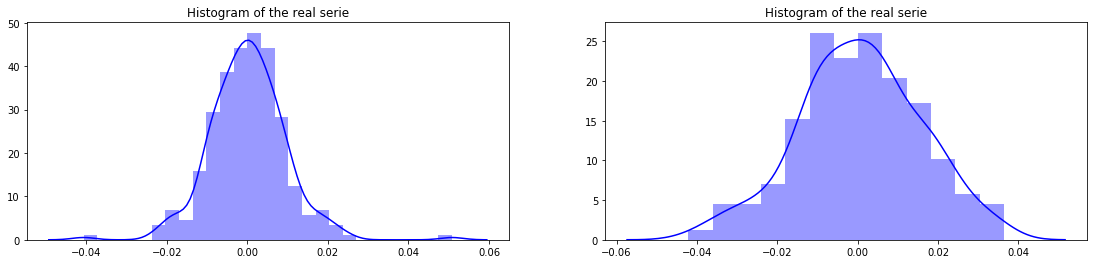

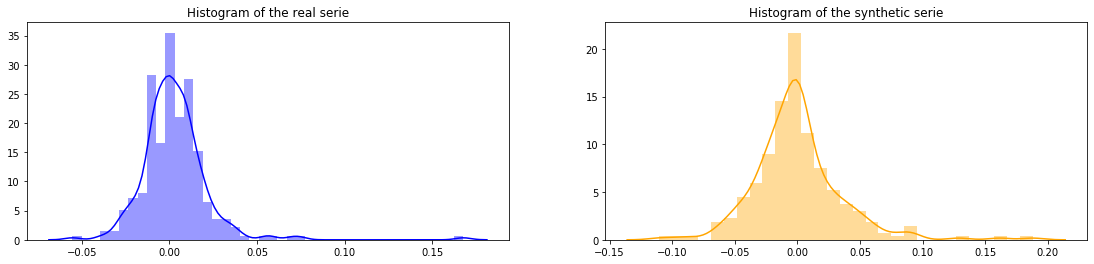

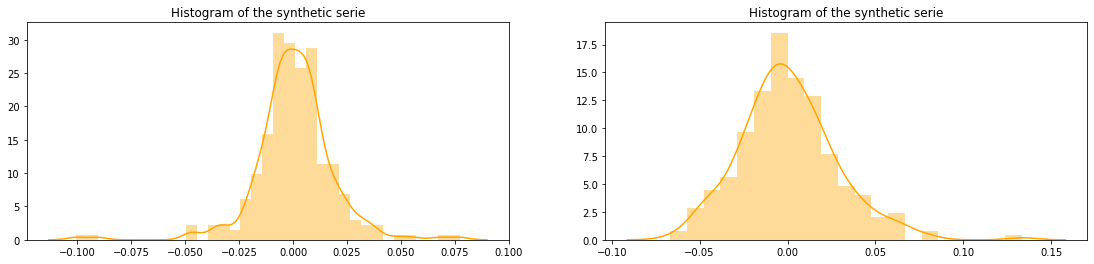

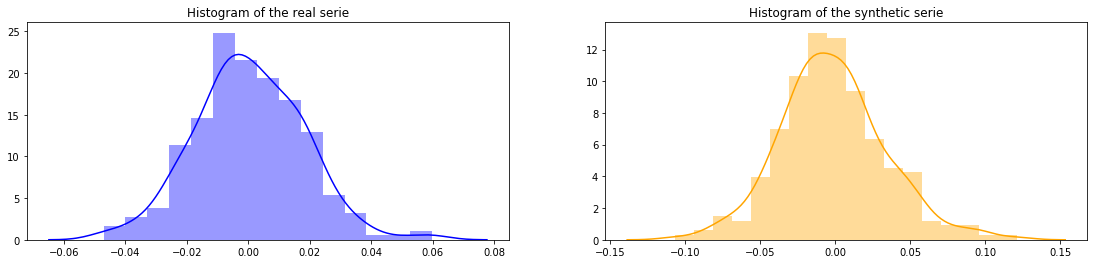

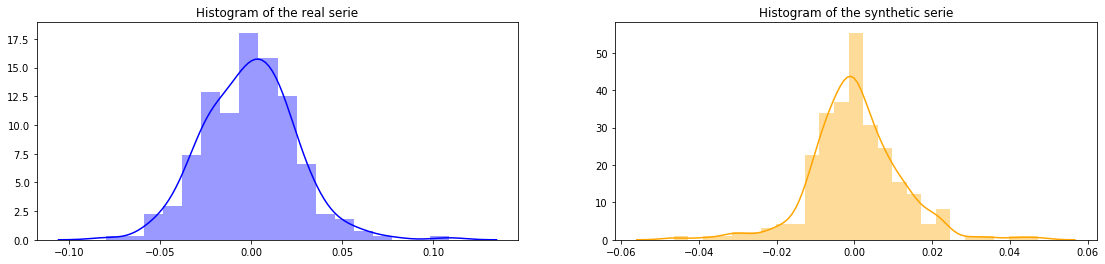

In [27]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

n=9
# Loop first n series by step 2
for i in range(0,n,2):
    

    # Get series
    serie, serie2 = X[i:i+1], X[i+1:i+2]

    # Define color blue and title of histogram of the real series
    color, title = 'blue', 'Histogram of the real serie'

    fig, ax =plt.subplots(1,2, figsize=(19,4))
    # Change color and title of histogram if series are synthetic
    if Y[i]==0:
        color, title='orange', 'Histogram of the synthetic serie'
    sns.distplot(serie, color= color, ax= ax[0]).set_title(title)

    if Y[i+1]==0:
        color, title='orange', 'Histogram of the synthetic serie'
    sns.distplot(serie2, color= color, ax= ax[1]).set_title(title)


Seeing a distribution like this may suggest the distribution is Normal. We could explore statistical hypothesis tests to formally check if the distribution is Normal.

We can calculate the mean and standard deviation of some series.

In [28]:
n=9
# Loop first n series by step 1
for i in range(0,n):
    # Get the series as numpy array
    serie = np.array(X[i:i+1])
    # Define title of real series
    title = 'Real serie'
    # Define title of synthetic series
    if Y[i]==0:
        title = 'Synthetic serie'

    print(title+':', 'mean:', round(np.mean(serie),4), 'standar deviation:', round(np.std(serie),4))
    

Real serie: mean: 0.0002 standar deviation: 0.0094
Real serie: mean: 0.0005 standar deviation: 0.0153
Real serie: mean: 0.0029 standar deviation: 0.0192
Synthetic serie: mean: -0.0001 standar deviation: 0.0352
Synthetic serie: mean: 0.0006 standar deviation: 0.0184
Synthetic serie: mean: 0.0005 standar deviation: 0.0277
Real serie: mean: 0.0003 standar deviation: 0.0176
Synthetic serie: mean: -0.0018 standar deviation: 0.0353
Real serie: mean: -0.0007 standar deviation: 0.025


#### Time Series Line Plot
In this plot, time is shown on the x-axis with observation values along the y-axis.

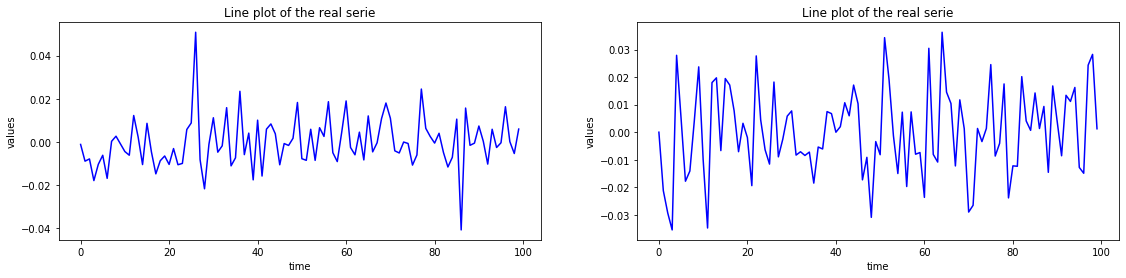

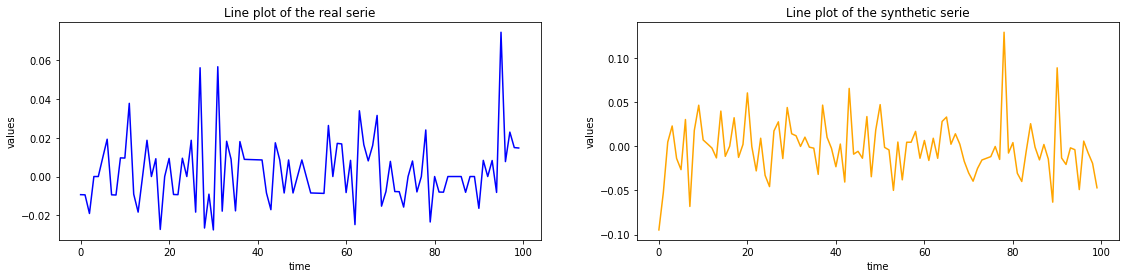

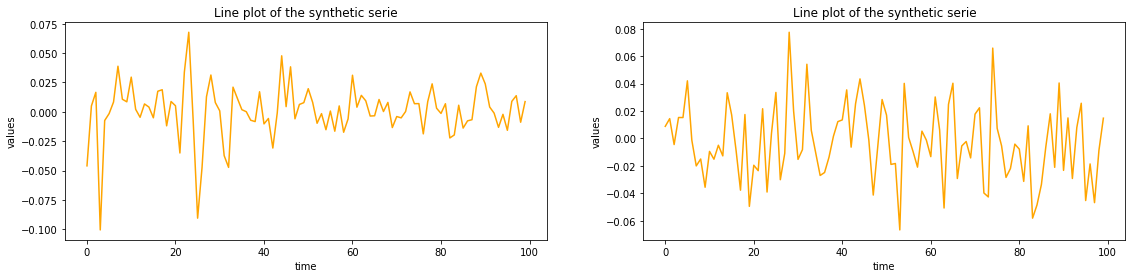

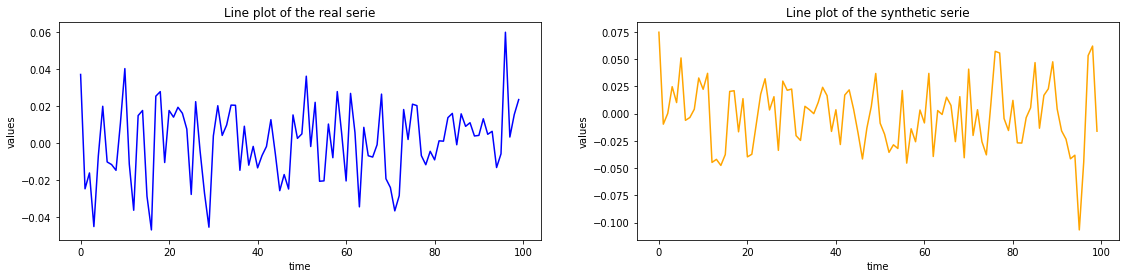

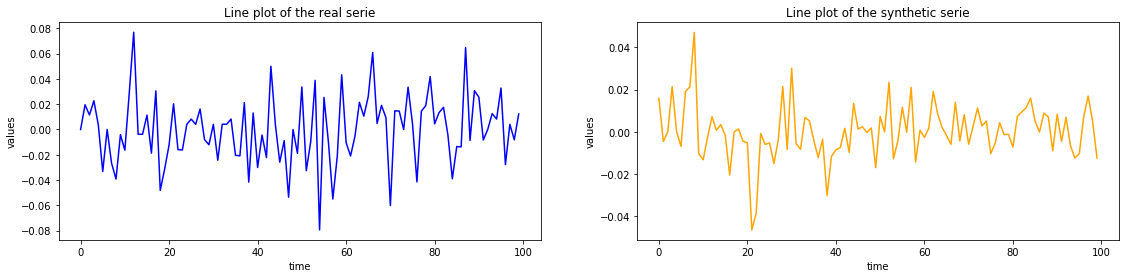

In [29]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
n=9
# Loop first n series by step 2
for i in range(0,9,2):
    # Get series
    serie, serie2 = X[i:i+1], X[i+1:i+2]

    # Create dataframe for each serie
    serie_column = DataFrame(serie.values[0], columns = ['values'])
    serie_column['time'] = np.arange(260)
    serie_column2 = DataFrame(serie2.values[0], columns = ['values'])
    serie_column2['time'] = np.arange(260)
    
    # Define color blue and title of the line plot of real series
    color, title = 'blue', 'Line plot of the real serie'
    fig, ax =plt.subplots(1,2, figsize=(19,4))
    
    # Change color and title of line plot if series are synthetic
    if Y[i]==0:
        color, title='orange', 'Line plot of the synthetic serie'
    sns.lineplot(x = 'time', y='values', data = serie_column[0:100], color = color, ax= ax[0]).set_title(title)
    if Y[i+1]==0:
        color, title='orange', 'Line plot of the synthetic serie'
    sns.lineplot(x = 'time', y='values', data = serie_column2[0:100], color = color, ax= ax[1]).set_title(title)

We observe that all series do not have a trend, the mean is fixed but the variability varies in different intervals of time. These series are not stationary.

There are another interesting plots to visualize time series such as
autocorrelation plots, lag scatter plots, Box and Whisker plots, etc.

## Analysis of the problem.

We have a target vector $Y = (y_{1}, . . ., y_{m})^{t}$ where the
entry $y_{i}$ of $Y$ describes a characteristic or state of serie i. Those can either be represented by discrete or continuous values. In our task, the characteristic(if serie is real or not) is represented by discrete value. In this case the prediction of the values from $Y$ based on the different time series $S = (S_{i,j} )_{i=1,...,m,j=1,...,n}$
states a multi-variate time series classification problem.





We cannot use some basic classifiers for TSC because these assume independent examples. However, there are different approaches to tackle these problems.


Shape-based approaches identify similar pairs of time series in terms of their
values through time. For this purpose, similarity metrics like the Euclidean
distance are applied and algorithms like k-nearest-neighbors (kNN) can be used
to find similar time series and their associated target values ${y_{1}, . . ., y_{m}}$. Then, the class label is for example predicted as the majority vote of across the k
neighbors. Dynamic Time Warping (DTW) is a variant of shape-based
approaches, which accommodates local (temporal) shifts in the data),


On the other hand, direct approaches learn a representation of the input
objects. Neural networks and their deep extensions deploy a network of neurons
and weights, being especially suited to applications where manual feature engineering is difficult. Common extensions like recurrent neural networks (RNN)
, or convolutional neural networks (CNN) have already been deployed for TSC tasks.

A last group of TSC approaches is feature-based, which will be discussed but before, as this is a classification problem, we see if the dataset is balanced, this is if the number of real series is similar to the number of synthetic series.

In [30]:
# Get real series and synthetic series of train dataset
real_series = Y[Y==1]
synthetic_series = Y[Y==0]

# Print lenght of real series and synthetic series
print(len(real_series), len(synthetic_series))

5000 5000


## Tsfresh algorithm



We look at how to automatically extract relevant features with a Python package called tsfresh.

The basic idea of FRESH algorithm is to extract characteristics feature from time series, such as min, max, average, percentile or other mathematical derivations. Then, it selects the important and useful features, by eliminating redundant features and noise from the system, to yield the best-predicted output. Finally, we can use these features to predict the target variable through normal supervised learning.


While Feature extraction is used to combine existing features to produce a more useful one, Feature selection helps in selecting the most useful features to train on among existing features.


In [31]:
# Install package tsfresh
!pip install tsfresh

Tsfresh package allows a specific format of data frame so we need to reshape the series dataset. The function stack from package Tsfresh does it automatically. Basically, all series are reshaped in only one column, generating two new columns:
- id: This column indicates which values the time series belongs to.
- time: This column depicts the time step of each time series.

This format is called Stacked DataFrame: time-series data is assumed to be a stacked DataFrame. This means that there are no different columns for the different types of time series. 
It does not contain different columns for the different types of time series but only one value column and a kind column.


We convert our time series dataset to the stacked data frame.

In [32]:
# Reshape data and get the tsfresh format 
series_tsfresh = X.stack()

# Change name of columns created
series_tsfresh.index.rename([ 'id', 'time' ], inplace = True )

series_stacked = series_tsfresh.reset_index()
series_stacked


,id,time,0
0,0,0,-0.001105
1,0,1,-0.008847
2,0,2,-0.007810
3,0,3,-0.017831
4,0,4,-0.010304
...,...,...,...
2599995,9999,255,-0.000226
2599996,9999,256,0.002492
2599997,9999,257,-0.021690
2599998,9999,258,-0.011316


#### Feature extraction

To characterize a time series and reduce the data
volume, a mapping is introduced, which captures a specific
aspect of the time series. One example of such mapping might be the maximum operator which quantifies the maximal value ever recorded for a specific time series. Other examples might be their mean, the number of peaks with a certain steepness, their periodicity, a global trend, etc.

This kind of lower-dimensional representation is called a feature, which is a measurable characteristic of the considered time series. The feature mappings that we considered cannot use information from other time series to derive its value.

In [33]:
from tsfresh import extract_features 

# Extract all features from time series. This procces can take a little time
features_extracted = extract_features(series_stacked, column_id = "id", column_sort = "time")


Feature Extraction: 100%|██████████| 5/5 [33:11<00:00, 393.94s/it]


In [36]:
print(features_extracted.shape)
features_extracted.head()

(10000, 754)


variable,0__abs_energy,0__absolute_sum_of_changes,"0__agg_autocorrelation__f_agg_""mean""__maxlag_40","0__agg_autocorrelation__f_agg_""median""__maxlag_40","0__agg_autocorrelation__f_agg_""var""__maxlag_40","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","0__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""","0__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""rvalue""","0__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""slope""","0__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""stderr""","0__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""intercept""","0__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""rvalue""","0__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""slope""","0__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""stderr""","0__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""intercept""","0__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""rvalue""","0__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""slope""","0__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""stderr""","0__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""intercept""","0__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""rvalue""","0__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""slope""","0__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""stderr""","0__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""intercept""","0__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""rvalue""","0__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""slope""","0__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""stderr""","0__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""intercept""","0__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""rvalue""","0__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""slope""","0__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""stderr""","0__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""intercept""","0__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""rvalue""","0__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""slope""","0__agg_linear_trend__f_agg_""min""__chunk_len_50__attr_""stderr""","0__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""intercept""","0__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""rvalue""","0__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""slope""",...,0__ratio_beyond_r_sigma__r_6,0__ratio_beyond_r_sigma__r_7,0__ratio_value_number_to_time_series_length,0__sample_entropy,0__skewness,0__spkt_welch_density__coeff_2,0__spkt_welch_density__coeff_5,0__spkt_welch_density__coeff_8,0__standard_deviation,0__sum_of_reoccurring_data_points,0__sum_of_reoccurring_values,0__sum_values,0__symmetry_looking__r_0.0,0__symmetry_looking__r_0.05,0__symmetry_looking__r_0.1,0__symmetry_looking__r_0.15000000000000002,0__symmetry_looking__r_0.2,0__symmetry_looking__r_0.25,0__symmetry_looking__r_0.30000000000000004,0__symmetry_looking__r_0.35000000000000003,0__symmetry_looking__r_0.4,0__symmetry_looking__r_0.45,0__symmetry_looking__r_0.5,0__symmetry_looking__r_0.55,0__symmetry_looking__r_0.6000000000000001,0__symmetry_looking__r_0.65,0__symmetry_looking__r_0.7000000000000001,0__symmetry_looking__r_0.75,0__symmetry_looking__r_0.8,0__symmetry_looking__r_0.8500000000000001,0__symmetry_looking__r_0.9,0__symmetry_looking__r_0.9500000000000001,0__time_reversal_asymmetry_statistic__lag_1,0__time_reversal_asymmetry_statistic__lag_2,0__time_reversal_asymmetry_statistic__lag_3,0__value_count__value_-1,0__value_count__value_0,0__value_count__value_1,0__variance,0__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.023066,2.621207,0.002064,0.000834,0.006172,0.010677,0.306576,0.0

We get a new data frame where rows represent each series and each column indicates a specific feature of series.
We have 10000 series and almost new 800 features.

A list of calculated features can be seen in the [link](https://tsfresh.readthedocs.io/en/latest/text/list_of_features.html)

We can see the bigger correlation between these features.

In [37]:
from pandas import DataFrame

# See how many charasteristics are correlated with each other
features_extracted_df = DataFrame(features_extracted)

# Get the higher correlations
features_extracted_df.corr().unstack().sort_values().drop_duplicates()


variable                                                   variable                                                 
0__percentage_of_reoccurring_datapoints_to_all_datapoints  0__ratio_value_number_to_time_series_length                 -1.0
0__ratio_value_number_to_time_series_length                0__has_duplicate                                            -1.0
0__sum_of_reoccurring_data_points                          0__percentage_of_reoccurring_datapoints_to_all_datapoints   -1.0
0__percentage_of_reoccurring_values_to_all_values          0__ratio_value_number_to_time_series_length                 -1.0
                                                           0__sum_of_reoccurring_data_points                           -1.0
                                                                                                                       ... 
0__sum_values                                              0__mean                                                      1.0
0__mean        

Now is time to apply feature selection to choose adequate characteristics. But we have two options:
- Applying principal component analysis(PCA) to the data frame of extracted features to get uncorrelated features and later use feature selection to select useful ones.
- Another alternative is applying directly feature selection to select useful features and then, if necessary, apply PCA to selected features

We have tried both options and we are going to apply second so the next step is feature selection. 


#### Selecting relevant features

Typically, time series are noisy and contain redundancies. Therefore, one
should keep the balance between extracting meaningful but probably fragile features and robust but probably non-significant features. Some features such as the median value will not be heavily influenced by outliers, others such as the maximal value of the time series will be intrinsically fragile. The choice of the
right time series feature mappings is crucial to capture the right characteristics for the task at hand.

TResh algorithm selects relevant features using Hypothesis tests.  

We split in training and test dataset to apply feature selection using training data, later train the model and finally observe how well model classify using data what model has no observed(test). 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_extracted, Y[0:10000],
                                                    test_size=0.25, random_state=42)

from tsfresh import select_features

# Select the most useful features using train data
features_selected = select_features(X_train, y_train , fdr_level=0.7)#  fdr_level = fdr_level, extractedFeaturesDataframe

In [42]:
print(features_selected.shape)
features_selected.head()

(7500, 177)


variable,0__ratio_beyond_r_sigma__r_2.5,0__sample_entropy,0__ratio_beyond_r_sigma__r_0.5,0__ratio_beyond_r_sigma__r_2,0__count_above_mean,0__count_below_mean,0__ratio_beyond_r_sigma__r_1,"0__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.6",0__ratio_beyond_r_sigma__r_3,"0__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.4",0__approximate_entropy__m_2__r_0.5,0__approximate_entropy__m_2__r_0.3,"0__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.4",0__number_cwt_peaks__n_5,"0__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.2","0__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.6","0__fft_coefficient__coeff_22__attr_""abs""",0__approximate_entropy__m_2__r_0.7,"0__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.2","0__change_quantiles__f_agg_""var""__isabs_True__qh_0.4__ql_0.2",0__quantile__q_0.3,"0__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.2","0__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.4","0__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.4","0__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.2",0__autocorrelation__lag_9,0__ar_coefficient__k_10__coeff_0,0__autocorrelation__lag_7,0__number_peaks__n_50,"0__fft_coefficient__coeff_0__attr_""real""",0__mean,0__sum_values,0__partial_autocorrelation__lag_9,0__quantile__q_0.4,0__quantile__q_0.7,"0__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.2",0__partial_autocorrelation__lag_7,0__quantile__q_0.8,"0__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.4",0__longest_strike_above_mean,...,0__standard_deviation,0__abs_energy,"0__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.0",0__cid_ce__normalize_False,"0__fft_coefficient__coeff_40__attr_""real""",0__ratio_beyond_r_sigma__r_1.5,0__autocorrelation__lag_6,0__partial_autocorrelation__lag_8,"0__fft_coefficient__coeff_41__attr_""imag""","0__fft_coefficient__coeff_2__attr_""abs""","0__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.0",0__index_mass_quantile__q_0.2,"0__fft_coefficient__coeff_93__attr_""abs""","0__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""stderr""","0__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.6","0__fft_coefficient__coeff_9__attr_""imag""",0__energy_ratio_by_chunks__num_segments_10__segment_focus_5,"0__fft_coefficient__coeff_99__attr_""angle""","0__fft_coefficient__coeff_41__attr_""angle""",0__longest_strike_below_mean,"0__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.4","0__fft_coefficient__coeff_15__attr_""abs""","0__fft_coefficient__coeff_34__attr_""abs""",0__median,"0__fft_coefficient__coeff_49__attr_""abs""",0__partial_autocorrelation__lag_1,0__autocorrelation__lag_1,"0__fft_coefficient__coeff_44__attr_""abs""",0__energy_ratio_by_chunks__num_segments_10__segment_focus_9,"0__agg_linear_trend__f_agg_""var""__chunk_len_5__attr_""stderr""","0__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""stderr""",0__partial_autocorrelation__lag_2,"0__fft_coefficient__coeff_74__attr_""abs""",0__ar_coefficient__k_10__coeff_2,0__energy_ratio_by_chunks__num_segments_10__segment_focus_4,0__range_count__max_1000000000000.0__min_0,0__ar_coefficient__k_10__coeff_1,0__cid_ce__normalize_True,"0__fft_coefficient__coeff_19__attr_""abs""","0__fft_aggregated__aggtype_""variance"""
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4901,0.023077,2.032053,0.557692,0.050000,127.0,133.0,0.250000,0.000007,0.011538,2.101075e-06,1.098174,1.221659,0.000013,25.0,0.000028,0.000015,0.133679,0.905266,0.000011,2.927234e-06,-0.007281,0.000082,0.000006,0.000036,0.007338,0.085746,0.001274,-0.025789,1.0,0.188561,0.000725,0.188561,0.080435,-0.002488,0.006536,0.000030,-0.029373,0.012499,0.004816,6.0,...,0.016874,0.074171,0.000585,0.389172,-0.078592,0.088462,-0.029951,-0.024512,0.058720,0.108657,0.011850,0.196154,0.245164,0.000484,0.000214,-0.055642,0.033778,-156.359445,33.954488,7.0,0.000111,0.173881,0.301377,2.221299e-04,0.285429

When selecting, there is a hyperparameter to tune: fdr_level. It is the theoretically expected percentage of irrelevant features among all created features. By default, it is set pretty low, at 5%. As long as our downstream classifier can deal with non-informative features (and which isn’t?), we might want to increase the fdr_level, depending on several features we get from selection to 0.5, or 0.9.

We will see the correlation of characteristics with each other is high. If we would use a model assumes independent regressor variables we could do PCA to solve this problem. 

In [0]:
# Get names of features selected
names_features_selected = features_selected.columns

## Train model and evaluating.

We scale the data.

In [0]:
from sklearn.preprocessing import StandardScaler

# Scale selected features dataframe
scaler2 = StandardScaler()
scaler2.fit(features_selected)
train_features_selected_scaled = scaler2.transform(features_selected)
test_features_selected_scaled = scaler2.transform(X_test[names_features_selected])



We have proved some classification algorithms of supervised learning and choice boosting ensemble methods to train the model. We also have trained a basic model like is logistic regression in order to compare them. For the logistic regression model, we have used PCA before training of the model.

### Gradient Boosting Classifier

In [45]:

from sklearn.ensemble import GradientBoostingClassifier

# Define model
boosting_model = GradientBoostingClassifier(loss='exponential', learning_rate=0.2, n_estimators=200,
                                            min_samples_leaf=4, max_depth=8, random_state=0)

# Train model
boosting_model = boosting_model.fit(train_features_selected_scaled, y_train)

print('score train:',boosting_model.score(train_features_selected_scaled, y_train))
print('score test:',boosting_model.score(test_features_selected_scaled, y_test))


score train: 1.0
score test: 0.8388


**Cross Validation** 

In [46]:
from sklearn.model_selection import KFold

# Cross validation
def cv_estimate(n_splits=None):
    # Define number splits n
    cv = KFold(n_splits=n_splits, random_state = 1)

    # Define the model
    cv_clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.2, n_estimators=200, min_samples_leaf=4, max_depth=8,
                                        random_state=0)
    # Loop number of folds n
    for n in range(n_splits):
        X_train_cv, X_val, y_train_cv, y_val = train_test_split(features_extracted, Y[0:10000],
                                                    test_size=0.25) # Do not fix seed
        # Select the most useful features using train data
        features_selected_k = select_features(X_train_cv, y_train_cv , fdr_level=0.7)

        # Get names of features selected
        names_features_selected_k = features_selected_k.columns
        # Scale selected features dataframe
        scaler_k = StandardScaler()
        scaler_k.fit(features_selected_k)
        train_features_selected_scaled_k = scaler_k.transform(features_selected_k)
        test_features_selected_scaled_k = scaler_k.transform(X_val[names_features_selected_k])
        
        # Train model
        cv_clf.fit(train_features_selected_scaled_k, y_train_cv)
        print('K:',n+1)
        print('train score :',cv_clf.score(train_features_selected_scaled_k, y_train_cv))
        print('validation score :',cv_clf.score(test_features_selected_scaled_k, y_val))    
 
cv_estimate(n_splits=5)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


K: 1
train, score : 1.0
validation score : 0.8328
K: 2
train, score : 1.0
validation score : 0.8196
K: 3
train, score : 1.0
validation score : 0.8304
K: 4
train, score : 1.0
validation score : 0.82
K: 5
train, score : 1.0
validation score : 0.8136


#### Metrics model


We get different measures of the model.

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict the values from the validation dataset
Y_pred = boosting_model.predict(test_features_selected_scaled)

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred)

# Convert validation observations to one hot vectors
Y_true = np.array(y_test)
print(classification_report(Y_true,Y_pred ))

              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84      1246
         1.0       0.85      0.82      0.84      1254

    accuracy                           0.84      2500
   macro avg       0.84      0.84      0.84      2500
weighted avg       0.84      0.84      0.84      2500



**Confusion matrix**

In [51]:
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred) 

# plot the confusion matrix
import seaborn as sns
plt.figure(figsize=(5,5))
#sns.heatmap(confusion_mtx, annot=True, fmt="d");
confusion_mtx

array([[1071,  175],
       [ 228, 1026]])

<Figure size 360x360 with 0 Axes>

**Roc curve and area under the curve**



Auc: 0.9236926586128242


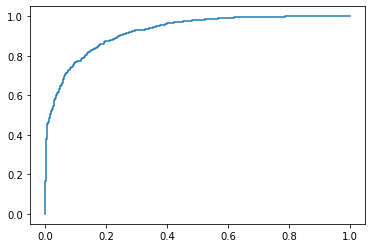

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score

# Get predicted probabilities of serie is real
Y_prob= boosting_model.predict_proba(test_features_selected_scaled)
Y_prob = Y_prob[:, 1]

# Print area under the curve
print('Auc:', roc_auc_score(Y_true, Y_prob))

# Plot roc curve
pr, tpr, thresholds = roc_curve(Y_true, Y_prob)
plt.plot(pr, tpr, label='RT + LR')

### Final Solution

In [0]:

# Select the most useful features using train data
features_selected_final = select_features(features_extracted, Y , fdr_level=0.7)#  fdr_level = fdr_level, extractedFeaturesDataframe

In [0]:
# Get names of features selected
names_features_selected_final = features_selected_final.columns

# Scale features selected 
scaler_final = StandardScaler()
scaler_final.fit(features_selected_final)
train_features_selected_scaled_final = scaler_final.transform(features_selected_final)

# Define model
boosting_model_final = GradientBoostingClassifier(loss='exponential', learning_rate=0.2, n_estimators=200,
                                    min_samples_split=2, min_samples_leaf=4, 
                                    max_depth=8, random_state=0)
# Train model
boosting_model_final = boosting_model_final.fit(train_features_selected_scaled_final, Y)



train, score : 1.0


In [0]:
train_features_selected_scaled_final.shape

(10000, 186)

### Test dataset

In [0]:
print(test.head())

          0         1         2    ...          257       258       259
0 -0.006804  0.004883 -0.007939    ...    -0.014290  0.002246 -0.005119
1  0.018173 -0.000102  0.012587    ...    -0.014046 -0.001368  0.013862
2 -0.002042  0.001233 -0.005525    ...    -0.009073  0.000838 -0.003315
3 -0.008555 -0.004554 -0.007224    ...     0.000907  0.000227 -0.001586
4 -0.007151 -0.007803 -0.031458    ...     0.007901  0.009346  0.004444

[5 rows x 260 columns]


In [0]:
# Reshape the data and get the tsfresh format 
series_test_tsfresh = test.stack()

# Change the name of columns created
series_test_tsfresh.index.rename([ 'id', 'time' ], inplace = True )

series_test_stacked = series_test_tsfresh.reset_index()
series_test_stacked.head()


,id,time,0
0,0,0,-0.006804
1,0,1,0.004883
2,0,2,-0.007939
3,0,3,0.007263
4,0,4,-0.008874
5,0,5,0.019018
6,0,6,0.001263
7,0,7,-0.021035
8,0,8,-0.003737
9,0,9,-0.011094


In [0]:
features_extracted_test = extract_features(series_test_stacked, column_id = "id", column_sort = "time")

Feature Extraction: 100%|██████████| 5/5 [50:29<00:00, 605.55s/it]


In [0]:
# Scale selected features in test data
test_features_selected_scaled_final = scaler_final.transform(features_extracted_test[names_features_selected_final])

# Get predicted probabilities of serie is real
Y_prob_final = boosting_model_final.predict_proba(test_features_selected_scaled_final)
Y_prob_final = Y_prob_final[:, 1]
Y_prob_final = DataFrame(Y_prob_final)


,0
52,0.000028
53,0.833194
54,0.000654
55,0.000848


# Documentation : 
- https://arxiv.org/pdf/1610.07717.pdf

- https://quantdare.com/data-diversity-synthetic-financial-time-series-generator/

To get models with higher prediction power we can appeal recurrent neural networks, the [link](https://arxiv.org/pdf/1809.04356.pdf) is an interesting study that offers an overview of the most successful deep learning
applications in various time series domains for TSC. 